# Predicting the Price of the used cars

We are using this dataset to predict the price of the used car with the patterns of of machine learning.

## 1. Problem definition
How well can we predict the future sales price of used cars with the characteristics and previous exampls of the price of the used vehicle in the existing dataset?

## 2. Data
The data is downloaded from Kaggle Bluebook for Price prediction for Used Cars:

3 main datasets:

* used_cars_train.csv - the training set
* used_cars_test.csv - the test set
* used_cars_sample_submission.csv - a sample submission file in the correct format

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check:
https://www.kaggle.com/competitions/used-car-price-prediction/data

Note: The goal for most regression evaluation metrics will be to build a machine learning model which minimises RMSLE.

RMSLE measures how close our guess is to the actual value. It pays more attention to being accurate with larger values. A lower RMSLE means our guess is closer, and a higher RMSLE means it's further away. The goal is to minimizing RMSLE~ yay ~~

## 4. Features

* id - a unique identifier for each row
* url - listing URL
* region - craigslist region
* region_url - region URL
* price - entry price
* year - year of vehicle
* manufacturer - manufacturer of vehicle
* model - model of vehicle
* condition - condition of vehicle
* cylinders - number of cylinders
* fuel - fuel type
* odometer - miles traveled by vehicle
* title_status - title status of vehicle
* transmission - transmission of vehicle
* VIN - vehicle identification number
* drive - type of drive
* size - size of vehicle
* type - generic type of vehicle
* paint_color - color of vehicle
* image_url - image URL
* description - listed description of vehicle
* state - state of listing
* lat - latitude of listing
* long - longitude of listing
* posting_date - date of posting the listing

## 5. Modeling

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map I will pick the following models:

* RandomForestRegressor
* Logistic Regression

In [20]:
# Unlease the magic of functions babe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sklearn
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

# we want our plots to appear inside the notebook
%matplotlib inline

In [50]:
# Read the first CSV file into a dataframe
df1 = pd.read_csv("used-car-price-prediction/used_cars_train.csv")

# Read the second CSV file into another dataframe
df2 = pd.read_csv("used-car-price-prediction/used_cars_test.csv")

# Concatenate the dataframes vertically
df = pd.concat([df1, df2], ignore_index=True)

# Display the labels of both datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390535 entries, 0 to 390534
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            390535 non-null  int64  
 1   url           390535 non-null  object 
 2   region        390535 non-null  object 
 3   region_url    390535 non-null  object 
 4   price         270535 non-null  float64
 5   year          389424 non-null  float64
 6   manufacturer  374766 non-null  object 
 7   model         386009 non-null  object 
 8   condition     241010 non-null  object 
 9   cylinders     232010 non-null  object 
 10  fuel          388003 non-null  object 
 11  odometer      388315 non-null  float64
 12  title_status  382870 non-null  object 
 13  transmission  388776 non-null  object 
 14  VIN           240026 non-null  object 
 15  drive         271589 non-null  object 
 16  size          109100 non-null  object 
 17  type          306288 non-null  object 
 18  pain

In [93]:
# Wanna see the first five by transposing the data for better viewing experience
df.head().T

,0,1,2,3,4
id,40508,77692,235190,248963,307927
url,https://palmsprings.craigslist.org/ctd/d/fonta...,https://hartford.craigslist.org/ctd/d/bristol-...,https://newjersey.craigslist.org/ctd/d/farming...,https://hudsonvalley.craigslist.org/ctd/d/rens...,https://pittsburgh.craigslist.org/ctd/d/fenelt...
region,palm springs,hartford,north jersey,hudson valley,pittsburgh
region_url,https://palmsprings.craigslist.org,https://hartford.craigslist.org,https://newjersey.craigslist.org,https://hudsonvalley.craigslist.org,https://pittsburgh.craigslist.org
price,11555.0,4150.0,19995.0,39197.0,11500.0
year,2008.0,2004.0,2018.0,1948.0,2016.0
manufacturer,gmc,chevrolet,bmw,ford,subaru
model,sierra 1500 extended cab,blazer,3 series,f-1,crosstrek limited
condition,NaN,like new,NaN,excellent,NaN
cylinders,6 cylinders,6 cylinders,NaN,NaN,4 cylinders


In [94]:
# Look for the cavity of the dataset
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price           120000
year              1111
manufacturer     15769
model             4526
condition       149525
cylinders       158525
fuel              2532
odometer          2220
title_status      7665
transmission      1759
VIN             150509
drive           118946
size            281435
type             84247
paint_color     115635
image_url            0
description          2
state                0
lat               3422
long              3422
posting_date         0
dtype: int64

In [95]:
df1.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               761
manufacturer     10931
model             3098
condition       103635
cylinders       109770
fuel              1717
odometer          1534
title_status      5261
transmission      1197
VIN             104237
drive            82521
size            195358
type             58269
paint_color      80128
image_url            0
description          2
state                0
lat               2402
long              2402
posting_date         0
dtype: int64

In [96]:
df2.isna().sum()

id                  0
url                 0
region              0
region_url          0
year              350
manufacturer     4838
model            1428
condition       45890
cylinders       48755
fuel              815
odometer          686
title_status     2404
transmission      562
VIN             46272
drive           36425
size            86077
type            25978
paint_color     35507
image_url           0
description         0
state               0
lat              1020
long             1020
posting_date        0
dtype: int64

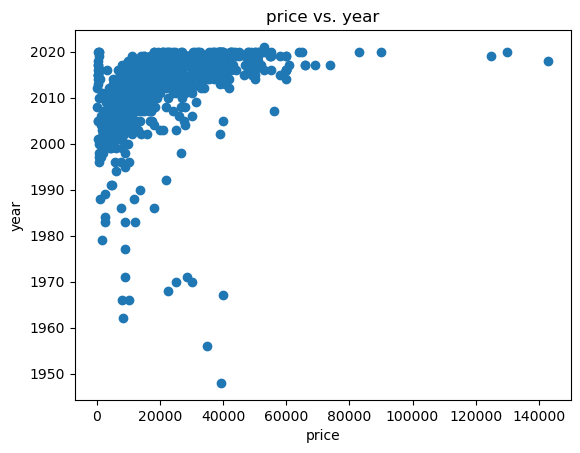

In [97]:
# Wanna see the correlation between the 'price' label with 'year' label on the scatter plot in a small sample group
fig, ax = plt.subplots()
ax.scatter(df["price"][:1000], df["year"][:1000])

# Add some graph labels
plt.title("price vs. year")
plt.xlabel("price")
plt.ylabel("year");

In [98]:
df.posting_date[:1000]

0      2021-04-18T12:04:57-0700
1      2021-04-10T12:15:35-0400
2      2021-04-22T19:10:22-0400
3      2021-04-21T03:00:42-0400
4      2021-04-23T17:30:18-0400
                 ...           
995    2021-04-24T06:20:55-0500
996    2021-04-29T09:14:05-0400
997    2021-04-13T08:54:30-0700
998    2021-04-06T09:06:20-0700
999    2021-04-12T16:41:58-0600
Name: posting_date, Length: 1000, dtype: object

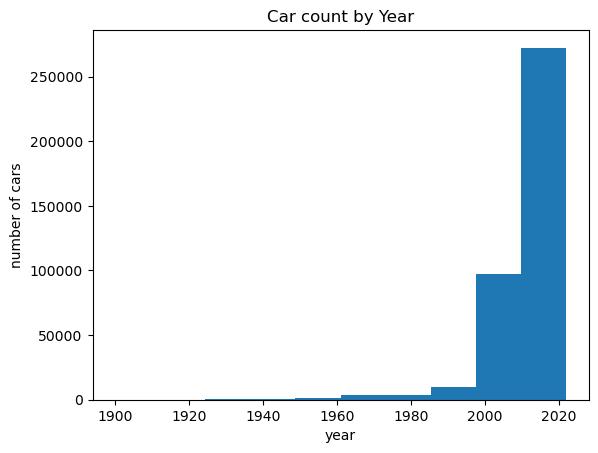

In [99]:
# Plot histogram of number of used car by Year
plt.hist(df['year'], bins=10)
plt.xlabel('year')
plt.ylabel('number of cars')
plt.title('Car count by Year')
plt.show()

ValueError: autodetected range of [nan, nan] is not finite

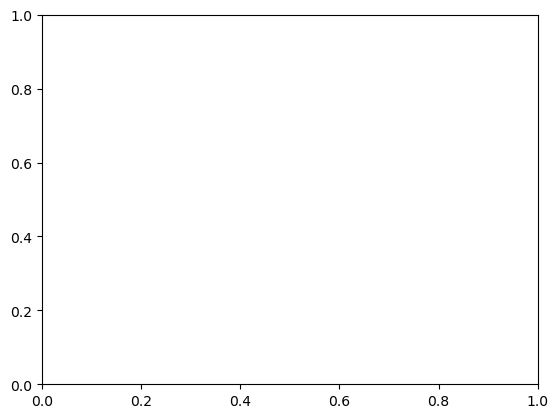

In [100]:
# How about Plot histogram of 'price' vs 'odometer'
x = df1['odometer']
y = df1['price']

plt.hist2d(x, y, bins=10, cmap='Blues')
plt.xlabel('odometer')
plt.ylabel('price')
plt.title('Histogram of mileage and price')

plt.show()

In [101]:
df.corr(numeric_only=True)

,id,price,year,odometer,lat,long
id,1.000000,0.005806,0.010996,0.002926,0.215990,0.258807
price,0.005806,1.000000,0.306419,-0.161929,-0.011906,-0.070787
year,0.010996,0.306419,1.000000,-0.169004,-0.014695,0.004343
odometer,0.002926,-0.161929,-0.169004,1.000000,0.001068,0.008076
lat,0.215990,-0.011906,-0.014695,0.001068,1.000000,-0.126493
long,0.258807,-0.070787,0.004343,0.008076,-0.126493,1.000000


In [102]:
df.price.head(30)

0     11555.0
1      4150.0
2     19995.0
3     39197.0
4     11500.0
5      1500.0
6     24990.0
7      4000.0
8     15990.0
9      4400.0
10    12899.0
11     6495.0
12    22990.0
13    12200.0
14    29990.0
15    14999.0
16    16999.0
17    16995.0
18    38590.0
19     8250.0
20    26590.0
21    25990.0
22     8250.0
23     6997.0
24    13995.0
25    20000.0
26    37900.0
27     5990.0
28    11000.0
29     5999.0
Name: price, dtype: float64

## Make a copy of the original concatenated 'df'

We want to duplicate the dataset before we manipulate without messing up the original dataset, I'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again. (thanks my buddy for the heads up)

In [ ]:
# Save a csv with all the data being concatenated into one combine dataset
df.to_csv('used-car-price-prediction/concatenated_TrainAndTest.csv', index=False)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390535 entries, 0 to 390534
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            390535 non-null  int64  
 1   url           390535 non-null  object 
 2   region        390535 non-null  object 
 3   region_url    390535 non-null  object 
 4   price         270535 non-null  float64
 5   year          389424 non-null  float64
 6   manufacturer  374766 non-null  object 
 7   model         386009 non-null  object 
 8   condition     241010 non-null  object 
 9   cylinders     232010 non-null  object 
 10  fuel          388003 non-null  object 
 11  odometer      388315 non-null  float64
 12  title_status  382870 non-null  object 
 13  transmission  388776 non-null  object 
 14  VIN           240026 non-null  object 
 15  drive         271589 non-null  object 
 16  size          109100 non-null  object 
 17  type          306288 non-null  object 
 18  pain

### To investigate the repeated data on the concatenated dataset (Housekeeping!! )

1. We need to find out the repeated rows of used car info by looking into 'VIN' column 
2. Make sure to drop all the duplicated used car infos to optimize the authenticity of the combined dataset

In [104]:
# Check for duplicates in the whole dataset search by 'id'
duplicates = df['id'].duplicated()

# Print the duplicate values
print(df[duplicates])

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, state, lat, long, posting_date]
Index: []


#### Seems like there is no repeats based on the 'id' column

lets move down to 'VIN' column

In [105]:
# Check for duplicates in the whole dataset search by 'VIN'
duplicates = df['VIN'].duplicated()

# Print the duplicate values
print(df[duplicates])

            id                                                url  \
4       307927  https://pittsburgh.craigslist.org/ctd/d/fenelt...   
5        32342  https://merced.craigslist.org/cto/d/merced-for...   
7       106629  https://tampa.craigslist.org/hdo/cto/d/spring-...   
13      140100  https://indianapolis.craigslist.org/ctd/d/moun...   
17      250970  https://longisland.craigslist.org/cto/d/center...   
...        ...                                                ...   
390530  176987  https://worcester.craigslist.org/ctd/d/fitchbu...   
390531  376530  https://yakima.craigslist.org/ctd/d/parker-200...   
390532  175944  https://westernmass.craigslist.org/ctd/d/plais...   
390533  220770  https://onslow.craigslist.org/ctd/d/jacksonvil...   
390534  217629  https://fayetteville.craigslist.org/ctd/d/faye...   

                        region                           region_url    price  \
4                   pittsburgh    https://pittsburgh.craigslist.org  11500.0   
5          

In [106]:
# Find a VIN number '1FTEW1EP4HKD50585' of all the rows of specific data and display them all at once
vin_value = '1FTEW1EP4HKD50585'
duplicates = df[df['VIN'] == vin_value]
# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', True)  # Disable column wrapping
# Print the duplicate values
print(duplicates)

            id                                                url  \
27893   377039  https://yakima.craigslist.org/ctd/d/pasco-2017...   
118838  369334  https://kpr.craigslist.org/ctd/d/pasco-2017-fo...   
225326  368651  https://kpr.craigslist.org/ctd/d/pasco-trucks-...   
226055  369740  https://kpr.craigslist.org/ctd/d/pasco-2017-fo...   
259414  289194  https://eastoregon.craigslist.org/ctd/d/pasco-...   
293612  375755  https://wenatchee.craigslist.org/ctd/d/pasco-2...   
296774  368109  https://kpr.craigslist.org/ctd/d/pasco-2017-fo...   
350988  370091  https://kpr.craigslist.org/ctd/d/pasco-2017-fo...   
353173  370759  https://moseslake.craigslist.org/ctd/d/pasco-2...   
357522  370215  https://moseslake.craigslist.org/ctd/d/pasco-2...   
378104  367931  https://kpr.craigslist.org/ctd/d/pasco-2017-fo...   

                          region                         region_url    price  \
27893                     yakima      https://yakima.craigslist.org  38999.0   
118838  ken

In [109]:
### Ok gotta erase all the repeated rows

df.drop_duplicates(subset='VIN', inplace=True)

# Check for duplicates in the whole dataset search by 'VIN' again AFTER deleting the repeated row
duplicates = df['VIN'].duplicated()

# Print the duplicate values
print(df[duplicates])

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, state, lat, long, posting_date]
Index: []


In [110]:
# Look for the cavity of the dataset
df.isna().sum()

id                  0
url                 0
region              0
region_url          0
price           23167
year              583
manufacturer     2892
model             521
condition       48796
cylinders       40816
fuel             1354
odometer          704
title_status     3277
transmission      897
VIN                 1
drive           23588
size            78306
type            14031
paint_color     25776
image_url           0
description         1
state               0
lat               821
long              821
posting_date        0
dtype: int64

### I want to keep the columns that are relevant to the prediction model

Drop the following columns:

1. id
2. url
3. region_url
4. size
5. image_url
6. description
7. lat
8. long
9. posting_date

keep the following columns:
1. manufacturer
2. model
3. condition
4. cylinders
5. fuel
6. title_status
7. transmission
8. VIN
9. drive
10. paint_color
11. state
12. type
13. region
14. price
15. year
16. odometer

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105494 entries, 0 to 390528
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            105494 non-null  int64  
 1   url           105494 non-null  object 
 2   region        105494 non-null  object 
 3   region_url    105494 non-null  object 
 4   price         82327 non-null   float64
 5   year          104911 non-null  float64
 6   manufacturer  102602 non-null  object 
 7   model         104973 non-null  object 
 8   condition     56698 non-null   object 
 9   cylinders     64678 non-null   object 
 10  fuel          104140 non-null  object 
 11  odometer      104790 non-null  float64
 12  title_status  102217 non-null  object 
 13  transmission  104597 non-null  object 
 14  VIN           105493 non-null  object 
 15  drive         81906 non-null   object 
 16  size          27188 non-null   object 
 17  type          91463 non-null   object 
 18  pain

In [114]:
df.head().T

,0,1,2,3,6
id,40508,77692,235190,248963,80777
url,https://palmsprings.craigslist.org/ctd/d/fonta...,https://hartford.craigslist.org/ctd/d/bristol-...,https://newjersey.craigslist.org/ctd/d/farming...,https://hudsonvalley.craigslist.org/ctd/d/rens...,https://washingtondc.craigslist.org/nva/ctd/d/...
region,palm springs,hartford,north jersey,hudson valley,"washington, DC"
region_url,https://palmsprings.craigslist.org,https://hartford.craigslist.org,https://newjersey.craigslist.org,https://hudsonvalley.craigslist.org,https://washingtondc.craigslist.org
price,11555.0,4150.0,19995.0,39197.0,24990.0
year,2008.0,2004.0,2018.0,1948.0,2018.0
manufacturer,gmc,chevrolet,bmw,ford,infiniti
model,sierra 1500 extended cab,blazer,3 series,f-1,q50 2.0t pure sedan 4d
condition,NaN,like new,NaN,excellent,good
cylinders,6 cylinders,6 cylinders,NaN,NaN,NaN


In [ ]:
# Drop columns 'B' and 'C'
df = df.drop(['id','url','region_url','size','image_url','description','lat','long','posting_date'], axis=1)

In [121]:
df.head().T

,0,1,2,3,6
region,palm springs,hartford,north jersey,hudson valley,"washington, DC"
price,11555.0,4150.0,19995.0,39197.0,24990.0
year,2008.0,2004.0,2018.0,1948.0,2018.0
manufacturer,gmc,chevrolet,bmw,ford,infiniti
model,sierra 1500 extended cab,blazer,3 series,f-1,q50 2.0t pure sedan 4d
condition,NaN,like new,NaN,excellent,good
cylinders,6 cylinders,6 cylinders,NaN,NaN,NaN
fuel,gas,gas,gas,gas,gas
odometer,196372.0,139670.0,31727.0,0.0,40500.0
title_status,clean,clean,clean,clean,clean


In [122]:
# Save a csv with all the data being concatenated into one combine dataset
df.to_csv('used-car-price-prediction/concatenated_TrainAndTest.csv', index=False)

### Filling and turning categorical variables into numbers

In [124]:
# These columns contain strings (thanks Chun for his analytical logic)
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

region
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
type
paint_color
state


In [133]:
categories = df['region'].cat.categories.to_list()
print(categories)

['SF bay area', 'abilene', 'akron / canton', 'albany', 'albuquerque', 'altoona-johnstown', 'amarillo', 'ames', 'anchorage / mat-su', 'ann arbor', 'annapolis', 'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens', 'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield', 'baltimore', 'baton rouge', 'battle creek', 'beaumont / port arthur', 'bellingham', 'bemidji', 'bend', 'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington', 'bloomington-normal', 'boise', 'boone', 'boston', 'boulder', 'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte', 'cape cod / islands', 'catskills', 'cedar rapids', 'central NJ', 'central louisiana', 'central michigan', 'champaign urbana', 'charleston', 'charlotte', 'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico', 'chillicothe', 'cincinnati', 'clarksville', 'cleveland', 'clovis / portales', 'college station', 'colorado springs', 'columbia', 'columbia / jeff city', 'columbus', 'cookeville', 'corp

In [135]:
categories = df['fuel'].cat.categories.to_list()
print(categories)

['diesel', 'electric', 'gas', 'hybrid', 'other']


In [136]:
categories = df['manufacturer'].cat.categories.to_list()
print(categories)

['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']


In [137]:
categories = df['cylinders'].cat.categories.to_list()
print(categories)

['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']


In [138]:
categories = df['type'].cat.categories.to_list()
print(categories)

['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon']


In [139]:
categories = df['drive'].cat.categories.to_list()
print(categories)

['4wd', 'fwd', 'rwd']


### Listing out the 'str' columns that needs to turn categorical variables into numerics `int`

Object `str` columns:
1. manufacturer
2. model
3. condition
4. cylinders
5. fuel
6. title_status
7. transmission
8. VIN
9. drive
10. paint_color
11. state
12. types

One way we can turnall of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatiblewith pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [116]:
df.tail().T

,390500,390511,390517,390523,390528
id,196306,49560,181802,53429,121969
url,https://fargo.craigslist.org/ctd/d/saint-cloud...,https://sandiego.craigslist.org/csd/ctd/d/2016...,https://detroit.craigslist.org/wyn/ctd/d/redfo...,https://santabarbara.craigslist.org/ctd/d/gole...,https://eastidaho.craigslist.org/ctd/d/idaho-f...
region,fargo / moorhead,san diego,detroit metro,santa barbara,east idaho
region_url,https://fargo.craigslist.org,https://sandiego.craigslist.org,https://detroit.craigslist.org,https://santabarbara.craigslist.org,https://eastidaho.craigslist.org
price,NaN,NaN,NaN,NaN,NaN
year,2019.0,2016.0,2018.0,2009.0,2008.0
manufacturer,ram,volkswagen,ford,volvo,honda
model,1500,jetta,transit cargo,c70,accord
condition,NaN,like new,excellent,excellent,excellent
cylinders,NaN,4 cylinders,NaN,5 cylinders,6 cylinders


In [142]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105494 entries, 0 to 390528
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   region        105494 non-null  category
 1   price         82327 non-null   float64 
 2   year          104911 non-null  float64 
 3   manufacturer  102602 non-null  category
 4   model         104973 non-null  category
 5   condition     56698 non-null   category
 6   cylinders     64678 non-null   category
 7   fuel          104140 non-null  category
 8   odometer      104790 non-null  float64 
 9   title_status  102217 non-null  category
 10  transmission  104597 non-null  category
 11  VIN           105493 non-null  category
 12  drive         81906 non-null   category
 13  type          91463 non-null   category
 14  paint_color   79718 non-null   category
 15  state         105494 non-null  category
dtypes: category(13), float64(3)
memory usage: 10.5 MB


In [144]:
df.state.cat.codes

0          4
1          6
2         31
3         34
6          7
8          4
9         24
10        43
11        34
12         9
14         9
15         4
16        23
18        42
20        38
21         4
23        45
24         4
26        35
29         4
30        32
31         4
35         4
37         5
38        37
39        22
40        11
42         1
43        19
46        37
47        48
48        35
52         4
53        19
54        47
55        14
57        42
58        26
60        13
63         5
64        43
65        38
67        23
71        35
72        12
73        24
74        37
75        39
76         4
78         4
79        12
81        31
83         4
85        19
88         1
91         9
92        13
93         3
94        40
95        45
97        34
100        9
101        4
102       31
104        5
105        4
107       22
112       22
113       34
114       48
117        4
119       10
120       47
122        0
123       32
125       38
127        9

In [145]:
df.isnull().sum()/len(df)

region          0.000000
price           0.219605
year            0.005526
manufacturer    0.027414
model           0.004939
condition       0.462548
cylinders       0.386904
fuel            0.012835
odometer        0.006673
title_status    0.031063
transmission    0.008503
VIN             0.000009
drive           0.223596
type            0.133003
paint_color     0.244336
state           0.000000
dtype: float64

In [154]:
# Turn categorical variable into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes + 1

In [155]:
pd.Categorical(df["transmission"]).codes+1

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105494 entries, 0 to 390528
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   105494 non-null  int16  
 1   price                    82327 non-null   float64
 2   year                     104911 non-null  float64
 3   manufacturer             105494 non-null  int8   
 4   model                    105494 non-null  int16  
 5   condition                105494 non-null  int8   
 6   cylinders                105494 non-null  int8   
 7   fuel                     105494 non-null  int8   
 8   odometer                 104790 non-null  float64
 9   title_status             105494 non-null  int8   
 10  transmission             105494 non-null  int8   
 11  VIN                      105494 non-null  int32  
 12  drive                    105494 non-null  int8   
 13  type                     105494 non-null  int8   
 14  pain

In [157]:
df.head().T

,0,1,2,3,6
region,264,138,240,149,380
price,11555.0,4150.0,19995.0,39197.0,24990.0
year,2008.0,2004.0,2018.0,1948.0,2018.0
manufacturer,15,8,5,14,19
model,13135,3835,727,6930,11725
condition,0,4,0,1,3
cylinders,6,6,0,0,0
fuel,3,3,3,3,3
odometer,196372.0,139670.0,31727.0,0.0,40500.0
title_status,1,1,1,1,1


In [158]:
df.isna().sum()

region                         0
price                      23167
year                         583
manufacturer                   0
model                          0
condition                      0
cylinders                      0
fuel                           0
odometer                     704
title_status                   0
transmission                   0
VIN                            0
drive                          0
type                           0
paint_color                    0
state                          0
region_is_missing              0
manufacturer_is_missing        0
model_is_missing               0
condition_is_missing           0
cylinders_is_missing           0
fuel_is_missing                0
title_status_is_missing        0
transmission_is_missing        0
VIN_is_missing                 0
drive_is_missing               0
type_is_missing                0
paint_color_is_missing         0
state_is_missing               0
dtype: int64

#### A significant chunk of 'price' column is missing from data

mean, medium, and mode just would not be able to justify the good middle ground when fill in the missing that takes up 20% of the overall dataset. The rows that missing had to be painfully dropped to maintain the accuracy of the prediction. 

In [162]:
### Ok gotta drop all the rows that is missing in 'price'

df.dropna(subset=['price'], inplace=True)

In [163]:
df.isna().sum()

region                       0
price                        0
year                       459
manufacturer                 0
model                        0
condition                    0
cylinders                    0
fuel                         0
odometer                   556
title_status                 0
transmission                 0
VIN                          0
drive                        0
type                         0
paint_color                  0
state                        0
region_is_missing            0
manufacturer_is_missing      0
model_is_missing             0
condition_is_missing         0
cylinders_is_missing         0
fuel_is_missing              0
title_status_is_missing      0
transmission_is_missing      0
VIN_is_missing               0
drive_is_missing             0
type_is_missing              0
paint_color_is_missing       0
state_is_missing             0
dtype: int64

In [166]:
# verify the remaining rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82327 entries, 0 to 270534
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   82327 non-null  int16  
 1   price                    82327 non-null  float64
 2   year                     81868 non-null  float64
 3   manufacturer             82327 non-null  int8   
 4   model                    82327 non-null  int16  
 5   condition                82327 non-null  int8   
 6   cylinders                82327 non-null  int8   
 7   fuel                     82327 non-null  int8   
 8   odometer                 81771 non-null  float64
 9   title_status             82327 non-null  int8   
 10  transmission             82327 non-null  int8   
 11  VIN                      82327 non-null  int32  
 12  drive                    82327 non-null  int8   
 13  type                     82327 non-null  int8   
 14  paint_color          

In [167]:
# Save a csv with all the datasets with filled in 'price' for further train-split-test
df.to_csv('used-car-price-prediction/train_split_test.csv', index=False)

### Will fill missing value with medians and means.

'year', 'odometer' are the remaining columns that needs to be filled in

In [9]:
# Fill missing values in the 'year' column with the median value
df['year'].fillna(df['year'].median(), inplace=True)

# Fill missing values in the 'odometer' column with the mean value
df['odometer'].fillna(df['odometer'].mean(), inplace=True)

In [10]:
# Lets have a final check for the missing value before we run the machine learning model.
df.isna().sum()

region                     0
price                      0
year                       0
manufacturer               0
model                      0
condition                  0
cylinders                  0
fuel                       0
odometer                   0
title_status               0
transmission               0
VIN                        0
drive                      0
type                       0
paint_color                0
state                      0
region_is_missing          0
manufacturer_is_missing    0
model_is_missing           0
condition_is_missing       0
cylinders_is_missing       0
fuel_is_missing            0
title_status_is_missing    0
transmission_is_missing    0
VIN_is_missing             0
drive_is_missing           0
type_is_missing            0
paint_color_is_missing     0
state_is_missing           0
dtype: int64

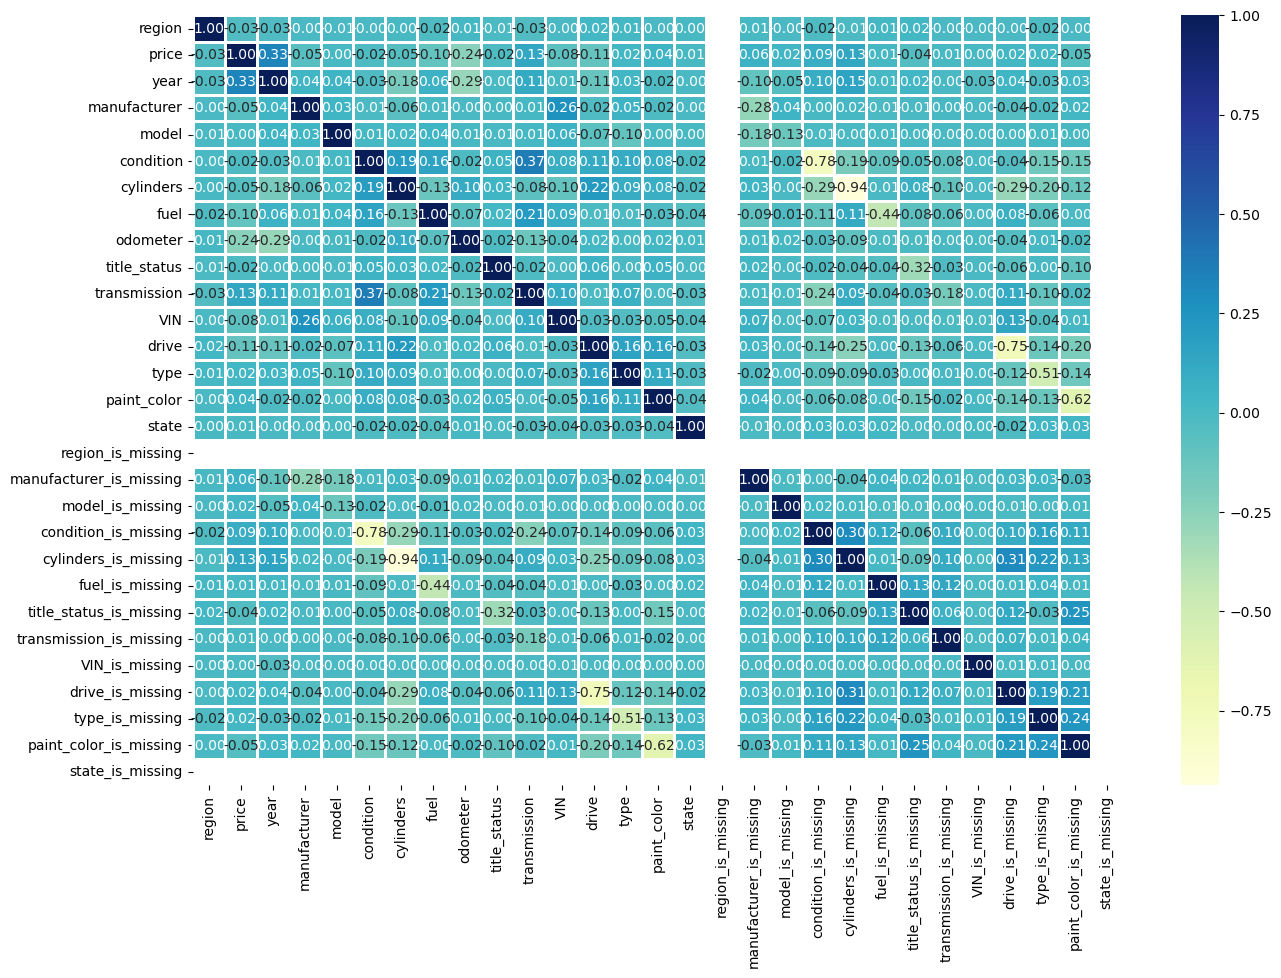

In [173]:
# Let's see our correlation matrix before modeling
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=1,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()

/var/folders/z0/mbkq8rh12wdd_3xwxl048nsr0000gn/T/ipykernel_11740/1352005967.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(df["price"][:3000],df["odometer"][:3000])


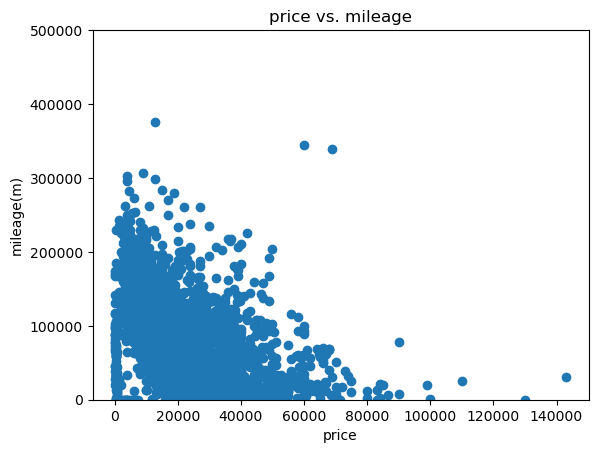

In [182]:
fig, ax = plt.subplots()
ax.scatter(df["price"][:3000],df["odometer"][:3000])

# Set y-axis limits
plt.ylim(0, 500000)

# Add some graph labels
plt.title("price vs. mileage")
plt.xlabel("price")
plt.ylabel("mileage(m)");

## Modeling

Now all of the data is numeric and there are no missing values, I should be able to build a machine learning model.
Let's instantiate the following models by learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html:

* RandomForestRegressor

In [187]:
%%time
# Instantiate RandomForestRegressor model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df.drop("price", axis=1), df.price)

CPU times: user 1min 8s, sys: 764 ms, total: 1min 9s
Wall time: 10.4 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [188]:
# Score the model
model.score(df.drop("price", axis=1), df.price)

0.9538082804912635

### Splitting data into train/validation sets

In [3]:
# Read the second CSV file into another dataframe
df = pd.read_csv("used-car-price-prediction/train_split_test.csv")

In [5]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,condition_is_missing,cylinders_is_missing,fuel_is_missing,title_status_is_missing,transmission_is_missing,VIN_is_missing,drive_is_missing,type_is_missing,paint_color_is_missing,state_is_missing
0,264,11555.0,2008.0,15,13135,0,6,3,196372.0,1,...,True,False,False,False,False,False,True,False,False,False
1,138,4150.0,2004.0,8,3835,4,6,3,139670.0,1,...,False,False,False,False,False,False,True,True,False,False
2,240,19995.0,2018.0,5,727,0,0,3,31727.0,1,...,True,True,False,False,False,False,True,True,True,False
3,149,39197.0,1948.0,14,6930,1,0,3,0.0,1,...,False,True,False,False,False,True,True,True,False,False
4,380,24990.0,2018.0,19,11725,3,0,3,40500.0,1,...,False,True,False,False,False,False,True,False,False,False


In [8]:
df.isna().sum()

region                       0
price                        0
year                       459
manufacturer                 0
model                        0
condition                    0
cylinders                    0
fuel                         0
odometer                   556
title_status                 0
transmission                 0
VIN                          0
drive                        0
type                         0
paint_color                  0
state                        0
region_is_missing            0
manufacturer_is_missing      0
model_is_missing             0
condition_is_missing         0
cylinders_is_missing         0
fuel_is_missing              0
title_status_is_missing      0
transmission_is_missing      0
VIN_is_missing               0
drive_is_missing             0
type_is_missing              0
paint_color_is_missing       0
state_is_missing             0
dtype: int64

In [11]:
# Convert specific float columns to int
df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

In [17]:
df.year

0        2008
1        2004
2        2018
3        1948
4        2018
         ... 
82322    2009
82323    2008
82324    2017
82325    2005
82326    2011
Name: year, Length: 82327, dtype: int64

In [15]:
df.year.value_counts()
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

2018    7532
2017    7338
2014    6827
2015    6593
2013    6518
        ... 
1946       1
1924       1
1931       1
1905       1
1933       1
Name: year, Length: 96, dtype: int64

In [19]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(df.drop("price", axis=1), df["price"], test_size=0.2, random_state=42)

# Split the training set into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the training, validation, and test sets
print("x_train shape:", x_train.shape)
print("x_valid shape:", x_valid.shape)
print("x_test shape:", x_test.shape)

x_train shape: (52688, 28)
x_valid shape: (13173, 28)
x_test shape: (16466, 28)


### Building an evaluation function

Will attempt to use root mean squared long error (RMSLE), R-squared (R²), and mean absolute error (MAE)

In [22]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_train, train_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)
Will fail to train by the model due to the enormity of samples size. 
Let's alter the number of sample sizes each n_estimator in the RandomForestRegressor using the max_samples parameter.

In [34]:
# # This takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)

# model.fit(x_train, y_train)

UsageError: Line magic function `%%time` not found.


In [31]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=20000)

In [32]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(x_train, y_train)

CPU times: user 22.1 s, sys: 95.1 ms, total: 22.2 s
Wall time: 2.94 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [33]:
show_scores(model)

{'Training MAE': 3045.902159125417,
 'Valid MAE': 4454.229654596524,
 'Training RMSLE': 0.6754658895113879,
 'Valid RMSLE': 0.6754658895113879,
 'Training R^2': 0.8480116860772557,
 'Valid R^2': 0.5520807908164742}

##### After cleaning the data with rounds of droping and fitting the sample size, I have significantly smaller samples than the original dataset. So i am going for the whole datset training

In [37]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(x_train, y_train)

CPU times: user 43.7 s, sys: 212 ms, total: 43.9 s
Wall time: 5.88 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
show_scores(model)

{'Training MAE': 1579.3175582675374,
 'Valid MAE': 4269.993890533668,
 'Training RMSLE': 0.5310044632140908,
 'Valid RMSLE': 0.5310044632140908,
 'Training R^2': 0.9547895808141498,
 'Valid R^2': 0.5601334389809064}

### Hyperparameter tuning with RandomizedSearchCV

lets crank up the accuracy by tweaking the n_iter when instantiate RandomizedSearchCV

In [40]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100,10),
           "max_depth": [None, 3, 5, 10,],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]
          } 

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                              random_state=42),
                        param_distributions=rf_grid,
                        n_iter=2,
                        cv=5,
                        verbose=True)

# Fit the randomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/peter/Desktop/sample_project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

CPU times: user 2.98 s, sys: 251 ms, total: 3.23 s
Wall time: 5.51 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [41]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [42]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 4446.194585998682,
 'Valid MAE': 4950.364427276847,
 'Training RMSLE': 0.7734220899425351,
 'Valid RMSLE': 0.7734220899425351,
 'Training R^2': 0.6731388806231271,
 'Valid R^2': 0.5014983844975769}

### Train a model with the best hyperparameters



In [43]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(x_train, y_train)

CPU times: user 15.1 s, sys: 79.1 ms, total: 15.2 s
Wall time: 2.15 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [45]:
show_scores(ideal_model)

{'Training MAE': 2912.237526480625,
 'Valid MAE': 4359.145984523958,
 'Training RMSLE': 0.6635268644976219,
 'Valid RMSLE': 0.6635268644976219,
 'Training R^2': 0.8507909116726864,
 'Valid R^2': 0.5579684358847457}

In [46]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(x_train, y_train)

CPU times: user 7.01 s, sys: 32.2 ms, total: 7.04 s
Wall time: 1.02 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [47]:
show_scores(fast_model)

{'Training MAE': 2572.068357512058,
 'Valid MAE': 4377.640632250551,
 'Training RMSLE': 0.6402664458172319,
 'Valid RMSLE': 0.6402664458172319,
 'Training R^2': 0.8585438498279104,
 'Valid R^2': 0.5516110543498989}

## Make predictions on test data
Now I've got a trained model, it's time to make predictions on the test data.

In [54]:
x_test.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,region_is_missing,manufacturer_is_missing,model_is_missing,condition_is_missing,cylinders_is_missing,fuel_is_missing,title_status_is_missing,transmission_is_missing,VIN_is_missing,drive_is_missing,type_is_missing,paint_color_is_missing,state_is_missing
54125,352,2015,26,10219,0,0,3,122400,1,1,59085,0,10,10,5,False,False,False,True,True,False,False,False,False,True,False,False,False
32584,270,2012,21,15668,1,6,3,97791,1,1,2293,1,1,0,4,False,False,False,False,False,False,False,False,False,False,False,True,False
9894,232,2015,14,6932,0,0,5,78787,1,1,16800,1,9,0,31,False,False,False,True,True,False,False,False,False,False,False,True,False
3269,129,2014,14,6520,0,4,3,100379,1,1,12830,1,1,10,23,False,False,False,True,False,False,False,False,False,False,False,False,False
23273,184,2013,8,13559,3,7,1,220620,1,1,26540,1,11,9,23,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
x_train.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,region_is_missing,manufacturer_is_missing,model_is_missing,condition_is_missing,cylinders_is_missing,fuel_is_missing,title_status_is_missing,transmission_is_missing,VIN_is_missing,drive_is_missing,type_is_missing,paint_color_is_missing,state_is_missing
8630,280,2016,13,1410,0,0,3,61531,1,1,105353,2,0,9,6,False,False,False,True,True,False,False,False,False,False,True,False,False
78808,356,2006,17,11395,0,6,3,159146,1,1,49213,1,1,0,10,False,False,False,True,False,False,False,False,False,False,False,True,False
46063,276,2016,26,10242,0,0,3,63062,1,1,81321,2,0,0,38,False,False,False,True,True,False,False,False,False,False,True,True,False
80708,231,2011,21,8775,0,6,3,158801,1,1,37259,1,0,10,43,False,False,False,True,False,False,False,False,False,False,True,False,False
29995,36,2018,4,2927,3,0,5,18176,1,3,96711,2,10,0,20,False,False,False,False,True,False,False,False,False,False,False,True,False


In [57]:
# Let's see how the model goes predicting on the test data
model.predict(x_test)

array([13058.05, 17640.7 , 34777.75, ..., 16048.11, 22634.43, 14664.1 ])

In [59]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(x_test)
test_preds

array([12702.86904157, 17713.16501341, 34274.17980293, ...,
       16749.93738808, 23264.19874575, 13995.87203708])

In [60]:
len(test_preds)

16466

In [62]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["VIN"] = x_test["VIN"]
df_preds["price"] = test_preds
df_preds

,VIN,price
54125,59085,12702.869042
32584,2293,17713.165013
9894,16800,34274.179803
3269,12830,12377.988969
23273,26540,27067.673981
...,...,...
16106,66154,6622.258073
71633,11670,34472.516359
76049,99235,16749.937388
30538,39225,23264.198746


In [63]:
# Export prediction data
df_preds.to_csv("used-car-price-prediction/test_predictions_result.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (price).

In [64]:
# Find feature importance of our model
ideal_model.feature_importances_

array([1.97950174e-02, 2.36843991e-01, 2.77205336e-02, 5.28363905e-02,
       8.08208377e-03, 5.90672902e-02, 8.17224122e-02, 1.91874708e-01,
       5.79640004e-03, 7.27681498e-03, 1.46763156e-01, 6.77321780e-02,
       2.18754027e-02, 1.45586069e-02, 1.74386671e-02, 0.00000000e+00,
       3.75518170e-03, 1.39576893e-03, 3.28510134e-03, 6.38458949e-03,
       6.60601700e-03, 3.44619014e-03, 1.47256753e-03, 1.14207889e-06,
       6.19593554e-03, 1.96084645e-03, 6.11300733e-03, 0.00000000e+00])

In [65]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

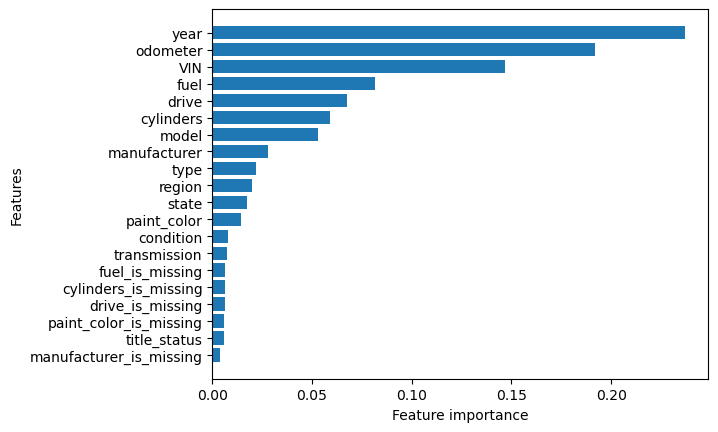

In [66]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [67]:
sum(ideal_model.feature_importances_)

0.9999999999999997